In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.lower()
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index(df["date"], inplace =True)
df.drop("date", axis =1,inplace = True)
df.sort_index(ascending=False, inplace=True)
df = df.loc["2018": "2000"]

df

,open,high,low,close,volume,adj close
date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
2000-01-07,96.50,101.00,95.50,99.50,115183600,3.40
2000-01-06,106.13,107.00,95.00,95.00,191993200,3.24
2000-01-05,103.75,110.56,103.00,104.00,194580400,3.55


In [ ]:
df_adj_close_rolling = df["adj close"].rolling(window=365).mean()
df_adj_close_rolling

date
2014-07-08         NaN
2014-07-07         NaN
2014-07-03         NaN
2014-07-02         NaN
2014-07-01         NaN
                ...   
2000-01-07    2.575616
2000-01-06    2.580712
2000-01-05    2.586630
2000-01-04    2.592384
2000-01-03    2.599123
Name: adj close, Length: 3650, dtype: float64

<AxesSubplot:xlabel='date', ylabel='adj close'>

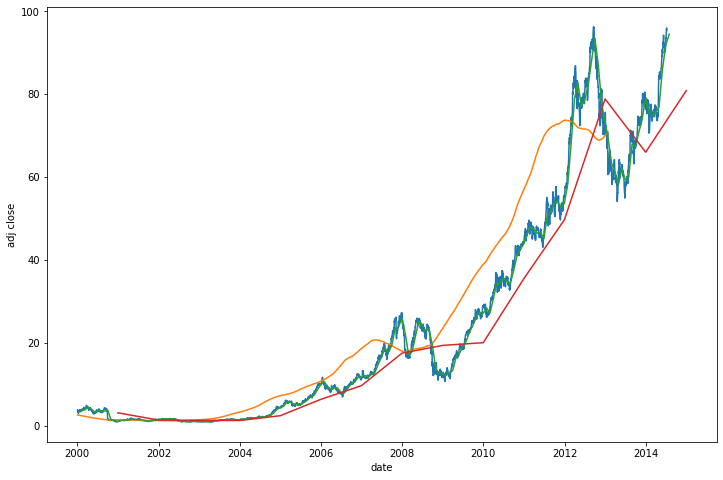

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data= df,
             x = df.index,
             y= "adj close")
             
sns.lineplot(data= df_adj_close_rolling,
             x = df_adj_close_rolling.index,
             y= df_adj_close_rolling.values)

resampled_month = df.resample("M").mean()
resampled_year = df.resample("Y").mean()

             
sns.lineplot(data= resampled_month,
             x = resampled_month.index,
             y= "adj close")
sns.lineplot(data= resampled_year,
             x = resampled_year.index,
             y= "adj close")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>